In [32]:
import xarray as xr
import cartopy.crs as ccrs
from concurrent.futures import ProcessPoolExecutor

In [33]:
from e3sm_utils import cmclimate

In [34]:
import glob

In [35]:
import matplotlib.pyplot as plt

In [36]:
import pandas as pd

In [37]:
flist = glob.glob('/global/project/projectdirs/m3312/crjones/e3sm/early_science_e3sm/hourly_2d_hist/remap/daily/*.nc')
dates_to_process = [f.split(sep='.')[-2] for f in flist]
len(sorted(dates_to_process))

365

In [38]:
pvar = 'PRECT'
topdir = {'sp': '/global/project/projectdirs/m3312/crjones/e3sm/early_science/hourly_2d_hist/remap/daily/',
          'e3sm': '/global/project/projectdirs/m3312/crjones/e3sm/early_science_e3sm/hourly_2d_hist/remap/daily/'}
ds_sp = xr.open_dataset('/global/project/projectdirs/m3312/crjones/e3sm/early_science/hourly_2d_hist/remap/daily/earlyscience.FC5AV1C-H01A.ne120.sp1_64x1_1000m.cam.h1.0001-01-01.nc')
ds_e3sm = xr.open_dataset('/global/project/projectdirs/m3312/crjones/e3sm/early_science_e3sm/hourly_2d_hist/remap/daily/earlyscience.FC5AV1C-H01A.ne120.E3SM.cam.h1.0001-01-01.nc')

In [45]:
fin = '/global/project/projectdirs/m3312/crjones/e3sm/early_science/hourly_2d_hist/remap/daily/earlyscience.FC5AV1C-H01A.ne120.sp1_64x1_1000m.cam.h1.0001-01-01.nc'

In [47]:
fin.replace('h1.', 'h1.CONUS.')

'/global/project/projectdirs/m3312/crjones/e3sm/early_science/hourly_2d_hist/remap/daily/earlyscience.FC5AV1C-H01A.ne120.sp1_64x1_1000m.cam.h1.CONUS.0001-01-01.nc'

In [44]:
ds_sp[['PRECT', 'FLNT']].sel(lat=slice(20, 50), lon=slice(220, 300))

<xarray.Dataset>
Dimensions:  (lat: 120, lon: 320, time: 24)
Coordinates:
  * time     (time) object 0001-01-01 00:00:00 ... 0001-01-01 23:00:00
  * lat      (lat) float64 20.12 20.38 20.62 20.88 ... 49.12 49.38 49.62 49.88
  * lon      (lon) float64 220.1 220.4 220.6 220.9 ... 299.1 299.4 299.6 299.9
Data variables:
    PRECT    (time, lat, lon) float32 ...
    FLNT     (time, lat, lon) float32 ...
Attributes:
    ne:                        120
    np:                        4
    Conventions:               CF-1.0
    source:                    CAM
    case:                      earlyscience.FC5AV1C-H01A.ne120.sp1_64x1_1000m...
    title:                     UNSET
    logname:                   hannah6
    host:                      
    Version:                   $Name$
    revision_Id:               $Id$
    initial_file:              /gpfs/alpine/world-shared/csc190/e3sm/cesm/inp...
    topography_file:           /gpfs/alpine/world-shared/csc190/e3sm/cesm/inp...
    time_period_fre

In [42]:
ds_sp.lat.diff(dim='lat')

<xarray.DataArray 'lat' (lat: 719)>
array([0.25, 0.25, 0.25, ..., 0.25, 0.25, 0.25])
Coordinates:
  * lat      (lat) float64 -89.62 -89.38 -89.12 -88.88 ... 89.38 89.62 89.88

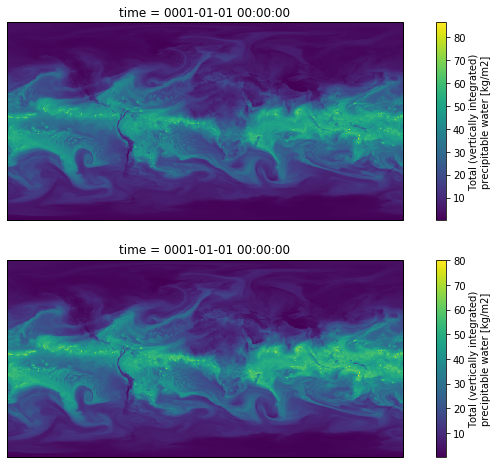

In [11]:
fig, ax = plt.subplots(nrows=2, ncols=1, subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(12, 8))
ds_sp[pvar].isel(time=0).plot(ax=ax[0], transform=ccrs.PlateCarree())
ds_e3sm[pvar].isel(time=0).plot(ax=ax[1], transform=ccrs.PlateCarree())

In [8]:
ds = xr.concat([ds_sp, ds_e3sm], dim=pd.Index(('MMF', 'E3SM'), name='model'))

In [10]:
ds['PRECT'] = ds['PRECT'] * 86400 * 1000
ds['PRECT'].attrs['units'] = 'mm/day'

In [22]:
p.fig.get_size_inches()

array([4., 6.])

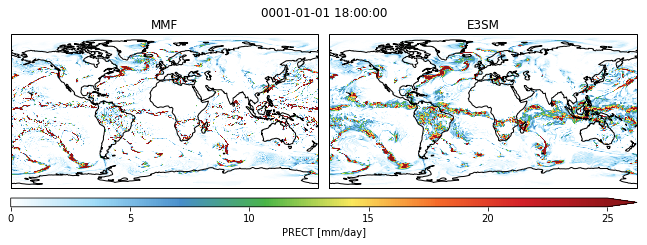

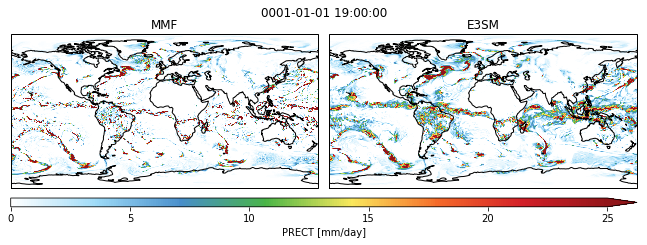

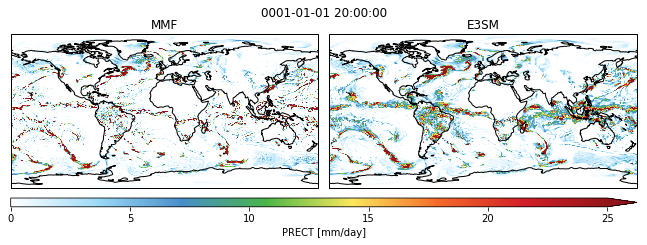

In [31]:
model_names = ['MMF', 'E3SM']
for i in range(18, 21):
    p = ds[pvar].isel(time=i).plot(col='model', subplot_kws={'projection': ccrs.PlateCarree()}, transform=ccrs.PlateCarree(),
                                   cmap=cmclimate.cm.WhiteBlueGreenYellowRed, robust=True, figsize=(9, 3), vmin=0, vmax=25, 
                                   cbar_kwargs={'orientation': 'horizontal', 'pad': 0.05, 'fraction': 0.05, 'aspect': 68, 'extend': 'max'},
                                  )
    p.fig.suptitle(str(ds.time[i].item()))
    for i, ax in enumerate(p.axes.flat):
        ax.coastlines()
        ax.set_title(model_names[i])

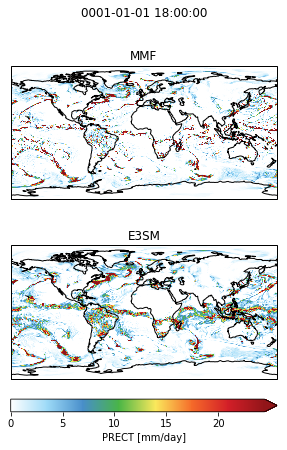

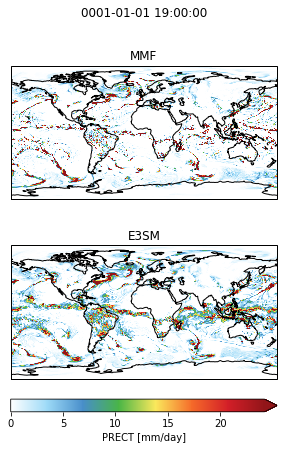

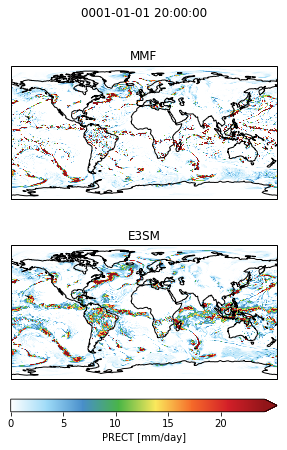

In [16]:
model_names = ['MMF', 'E3SM']
for i in range(18, 21):
    p = ds[pvar].isel(time=i).plot(row='model', subplot_kws={'projection': ccrs.PlateCarree()}, transform=ccrs.PlateCarree(),
                                   cmap=cmclimate.cm.WhiteBlueGreenYellowRed, robust=True,
                                   cbar_kwargs={'orientation': 'horizontal', 'pad': 0.05, 'fraction': 0.05})
    p.fig.suptitle(str(ds.time[i].item()))
    for i, ax in enumerate(p.axes.flat):
        ax.coastlines()
        ax.set_title(model_names[i])

In [54]:
p.fig.suptitle(str(ds.time[0].item()))
for ax in p.axes.flatten():
    ax.coastlines()
    ax.gridlines()
plt.show()

In [44]:
t = ds.time.isel(time=2).values.item()

In [45]:
t.strftime('%Y-%m-%d %H:%M')

'   1-01-01 02:00'

In [52]:
str(ds.time[2].item())

'0001-01-01 02:00:00'